# "Covid-19 Dashboard"

- badges: false
- author: Akshith Sriram

##### <center> You are now in my dashboard! All the plots here are created using matplotlib (python). <br> Use the 'Show Code' option to take a look at the source code.</center>


In [1]:
#collapse

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline

dft_cases = pd.read_csv('data/SnapshotCases-28-July.csv')
dft_deaths = pd.read_csv('data/SnapshotDeaths-28-July.csv')

# cumulative number of cases & deaths from 14-Jul-20
dft_cases["dt_today"] = dft_cases["28-Jul-20"]
dft_cases["dt_yday"] = dft_cases["27-Jul-20"]
dft_deaths["dt_today"] = dft_deaths["28-Jul-20"]
dft_deaths["dt_yday"] = dft_deaths["27-Jul-20"]

dfc_cases = dft_cases.groupby('states')["dt_today"].sum()
dfc_deaths = dft_deaths.groupby('states')["dt_today"].sum()
dfp_cases = dft_cases.groupby('states')["dt_yday"].sum()
dfp_deaths = dft_deaths.groupby('states')["dt_yday"].sum()

#Creating the new dataframe df_table
df_dfc_cases = pd.DataFrame(dfc_cases).reset_index().rename(columns={"states": "states", "dt_today": "Cases"})
df_dfp_cases = pd.DataFrame(dfp_cases).reset_index().rename(columns={"states": "states", "dt_yday": "PCases"})

df_dfc_deaths = pd.DataFrame(dfc_deaths).reset_index().rename(columns={"states": "states", "dt_today": "Deaths"})
df_dfp_deaths = pd.DataFrame(dfp_deaths).reset_index().rename(columns={"states": "states", "dt_yday": "PDeaths"})

df_table = pd.merge(df_dfc_cases,df_dfp_cases, how='outer')
df_table = pd.merge(df_table,df_dfc_deaths, how='outer')
df_table = pd.merge(df_table,df_dfp_deaths, how='outer')

for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

# Sorting the dataframe 
df_table.sort_values(by = ['Cases','Deaths'], ascending = [False, False], inplace = True)
df_table.reset_index(drop=True, inplace = True)

summary = {"updated":"28th July, 2020", "since":"27th July, 2020"}

for col in df_table.columns:
    if col not in ["states", "Fatality Rate"]:
        summary[col]= df_table[col].sum()



update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

# please un-comment the print statement to look at the summary dictionary.
#print(summary)

# HTML output.
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
'''


html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew))

display(html)

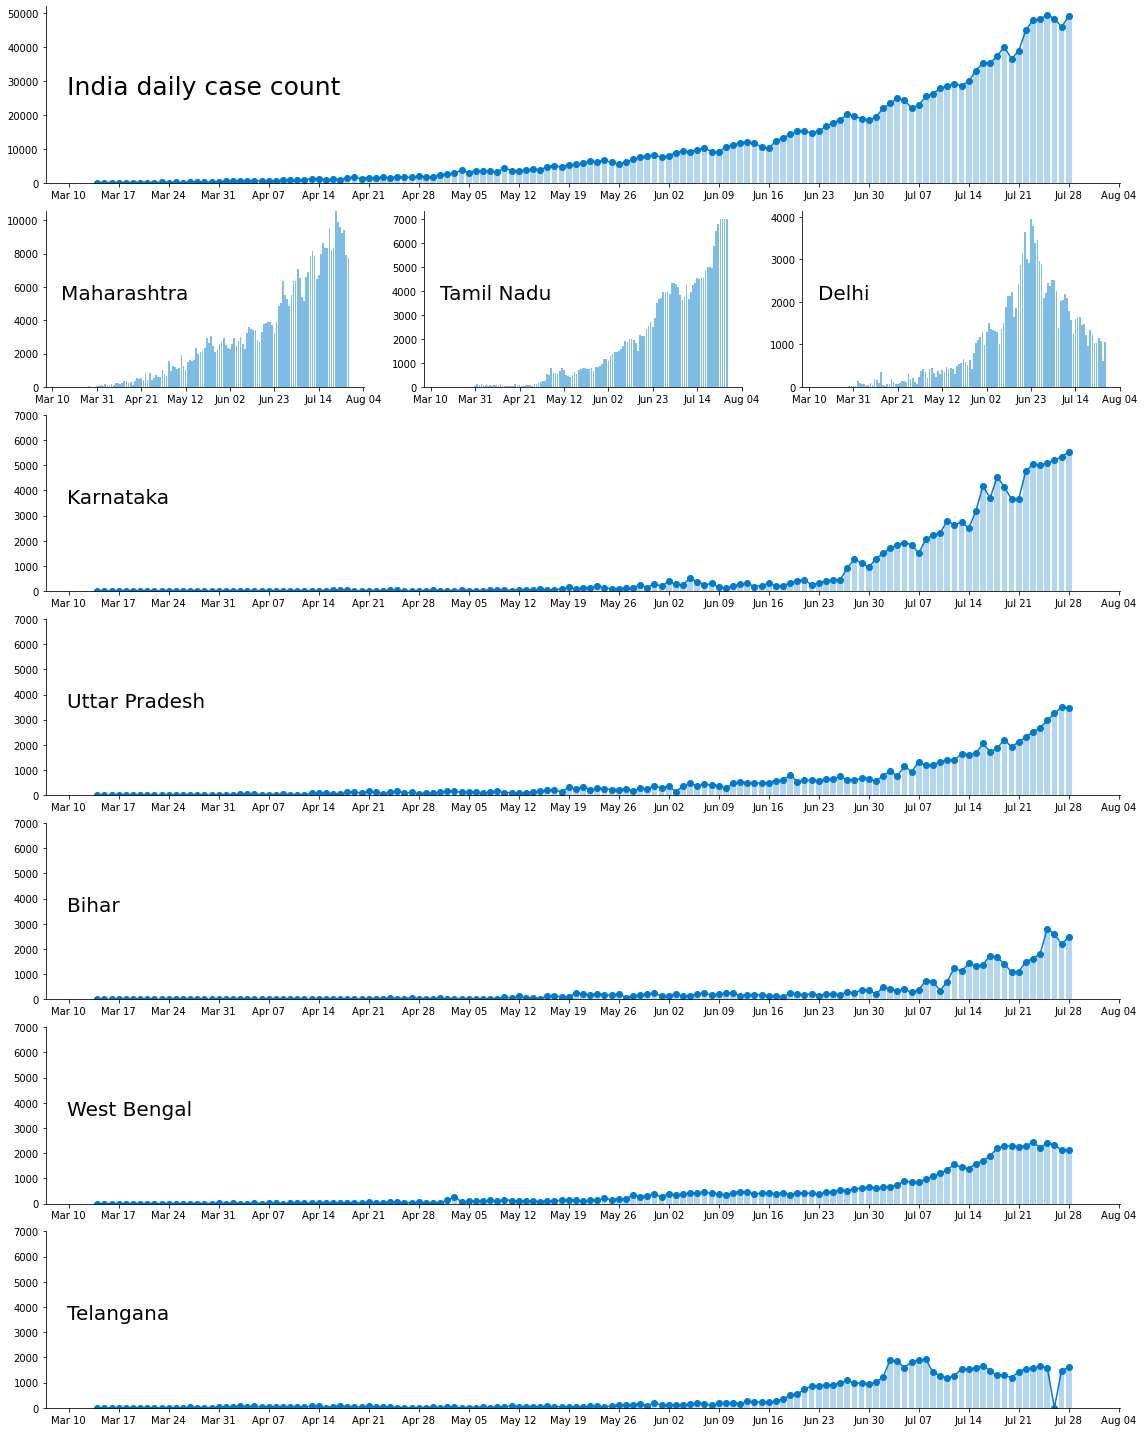

In [2]:
#collapse
dt_cols = list(dft_cases.columns[1:])
dft_ct_new_cases = dft_cases.groupby('states')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
dft_ct_new_cases.sort_values(by = '28-Jul-20', ascending = False,inplace = True)

df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()

df.drop(['dt_today', 'dt_yday'], axis=1, inplace = True)

n = 5
ef = df.loc['Total'].rename_axis('date').reset_index()

ef['date'] = ef['date'].astype('datetime64[ns]')


ax = []
fig = plt.figure(figsize = (16,20))
gs = fig.add_gridspec(n+2, 3)
# gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.02, 0.5,'India daily case count', transform = ax1.transAxes, fontsize=25);
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
ef = df.loc['Maharashtra'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

ax2.bar(ef.date, ef.Maharashtra,color = '#007acc',alpha=0.5)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_xticks(ax2.get_xticks()[::3])
maxyval = ef.Maharashtra.max()
ax2.set_ylim([0,maxyval])
ax2.text(0.05, 0.5,'Maharashtra', transform = ax2.transAxes, fontsize=20);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3 = fig.add_subplot(gs[1,1])
ef = df.loc['Tamil Nadu'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax3.bar(ef.date, ef['Tamil Nadu'],color = '#007acc',alpha=0.5,)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.text(0.05, 0.5,'Tamil Nadu', transform = ax3.transAxes, fontsize=20);
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax4 = fig.add_subplot(gs[1,2])
ef = df.loc['Delhi'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax4.bar(ef.date, ef.Delhi,color = '#007acc',alpha=0.5)
ax4.set_xticks([])
ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_xticks(ax4.get_xticks()[::3])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.text(0.05, 0.5,'Delhi', transform = ax4.transAxes, fontsize=20)

for i in range(n):
    
    ax.append(fig.add_subplot(gs[i+2,:]))
    ef = df.iloc[i+3].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date,ef.iloc[:,-1],color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.02,0.5,f'{ef.columns.values[-1]}',transform = ax[i].transAxes, fontsize = 20);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].set_ylim([0,7000])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.tight_layout()

In [3]:
#collapse
print(df_table.to_string(index=False))

                      states   Cases  PCases  Deaths  PDeaths  Cases (+)  Deaths (+)  Fatality Rate
                 Maharashtra  391440  383723   14164    13882       7717         282           3.62
                  Tamil Nadu  227688  220716    3659     3571       6972          88           1.61
                       Delhi  132275  131219    3881     3853       1056          28           2.93
              Andhra Pradesh  110297  102349    1148     1090       7948          58           1.04
                   Karnataka  107001  101465    2064     1962       5536         102           1.93
               Uttar Pradesh   73951   70493    1497     1456       3458          41           2.02
                 West Bengal   62964   60830    1449     1411       2134          38           2.30
                     Gujarat   57982   56874    2372     2348       1108          24           4.09
                   Telangana   57142   55532     480      471       1610           9           0.84
